Reading E-mails data whether it is a Ham or Spam



In [1]:
import pandas as pd
import numpy as np

In [3]:
sms = pd.read_csv('sms.csv')

In [12]:
sms.shape

(5572, 2)

In [4]:
sms.head(20)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
sms.label.value_counts()/sum(sms.label.value_counts()) * 100

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [6]:
# convert label to a numeric variable
sms['label'] = sms.label.map({'ham':0, 'spam':1})

In [7]:
sms.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import textblob
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS

In [16]:
import re
word=WordNetLemmatizer()

In [17]:
def pre_process_text(x):
    x=x.lower()
    x=x.strip()
    x = re.sub(r' +', ' ', x)
    x = re.sub(r"[-()\"#/@;:{}`+=~|.!?,^_^'0-9]", "", x)
    x=x=" ".join([word.lemmatize(w,pos='v') for w in x.split()])  # lemmatization
    x=str(TextBlob(x).correct()) # spelling correction
    return(x)

In [18]:
sms['message']=sms['message'].apply(lambda x:pre_process_text(x))

In [20]:
sms.head()

,label,message
0,0,go until during point crazy available only in ...
1,0,ok war joke if u on
2,1,free entry in a wily come to win a cup final t...
3,0,u dun say so early for u c already then say
4,0,ah i dont think he go to us he live around her...


In [21]:
x=sms.message
y=sms.label

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
train_x,test_x,train_y,test_y= train_test_split(x,y,test_size=0.3,random_state=100)
print(train_x.shape)
print(test_x.shape)
print(test_y.shape)
print(train_y.shape)

(3900,)
(1672,)
(1672,)
(3900,)


Vectorizing the E-mails

In [75]:
vect = CountVectorizer(analyzer='word',lowercase=True,ngram_range=(1,2), max_features=700, max_df=1.0, min_df=10,stop_words=['xxx','lui','ll','ltdecimal it','re'])

In [76]:
vect.fit(train_x)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['it', 'ltdecimal'] not in stop_words.
  warnings.warn(


CountVectorizer(max_features=700, min_df=10, ngram_range=(1, 2),
                stop_words=['xxx', 'lui', 'll', 'ltdecimal it', 're'])

In [77]:
X_train_dtm = vect.transform(train_x)
X_train_dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [78]:
vect.get_feature_names_out()

array(['able', 'able to', 'about', 'account', 'actually', 'aft', 'after',
       'afternoon', 'again', 'age', 'ah', 'all', 'all the', 'alone',
       'already', 'alright', 'also', 'always', 'amp', 'an', 'an hour',
       'and', 'and be', 'and have', 'and the', 'anna', 'another',
       'answer', 'any', 'anyone', 'anything', 'anyway', 'apply', 'around',
       'as', 'ask', 'at', 'at home', 'at the', 'attempt', 'await',
       'await collection', 'award', 'away', 'babe', 'baby', 'back', 'bad',
       'be', 'be able', 'be at', 'be award', 'be do', 'be go', 'be good',
       'be in', 'be it', 'be my', 'be not', 'be on', 'be that', 'be the',
       'be there', 'be very', 'be you', 'be your', 'beautiful', 'because',
       'bed', 'before', 'best', 'better', 'between', 'big', 'birthday',
       'bite', 'bonus', 'book', 'bore', 'both', 'box', 'boy', 'break',
       'bring', 'brother', 'bus', 'but', 'but in', 'buy', 'by', 'by the',
       'call', 'call from', 'call later', 'call me', 'call now'

In [79]:
DTM=pd.DataFrame(X_train_dtm.todense(),columns=vect.get_feature_names_out())

In [80]:
DTM

,able,able to,about,account,actually,aft,after,afternoon,again,age,...,you still,you to,you want,you will,your,your account,your mobile,your phone,yours,yourself
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


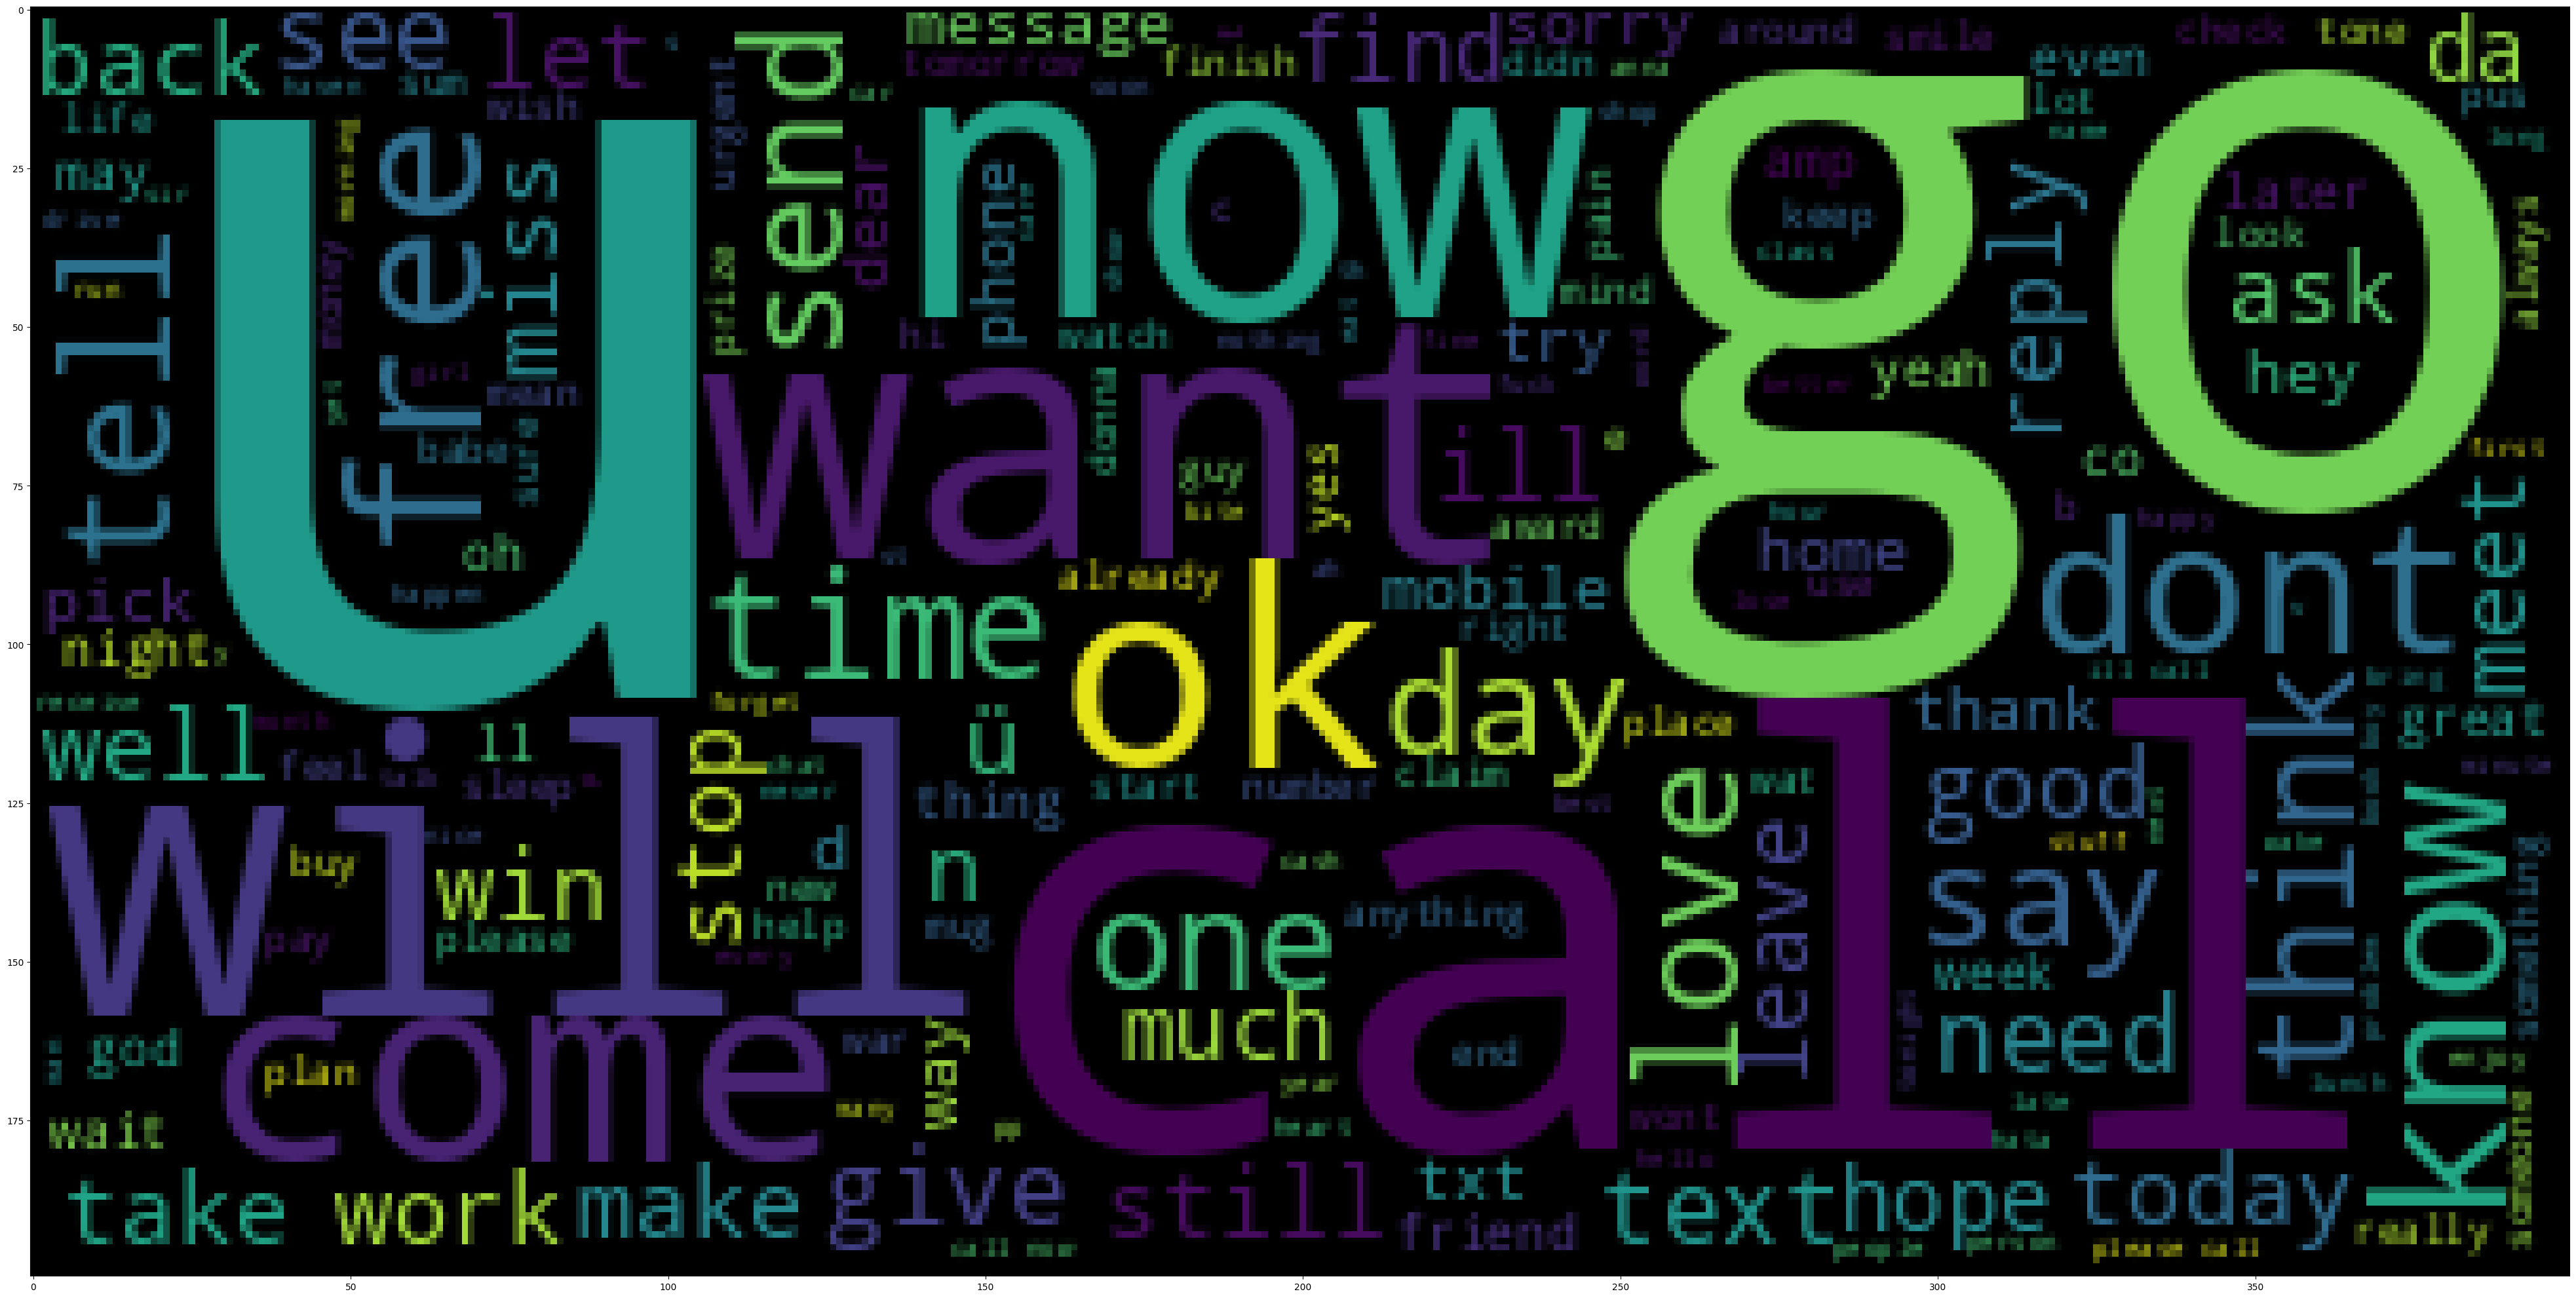

In [83]:
# Wordcloud using frequency of words
# using actual text
from matplotlib import pyplot as plt
wordcloud = WordCloud(stopwords=STOPWORDS).generate(' '.join(train_x.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(50,50))
plt.imshow(wordcloud)

Building a Naive Bayes model

In [84]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(DTM,train_y)

MultinomialNB()

In [86]:
X_test_dtm = vect.transform(test_x)  # convert x_test to dtm

In [87]:
# make class predictions for X_test_dtm
y_pred_class_train = nb.predict(DTM)
y_pred_class = nb.predict(X_test_dtm.toarray())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [89]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(test_y, y_pred_class))

0.9754784688995215


In [92]:
# confusion matrix
print(metrics.confusion_matrix(test_y, y_pred_class))

[[1430   18]
 [  23  201]]


In [93]:
print(metrics.classification_report(train_y, y_pred_class_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3377
           1       0.91      0.94      0.92       523

    accuracy                           0.98      3900
   macro avg       0.95      0.96      0.96      3900
weighted avg       0.98      0.98      0.98      3900



In [95]:
print(metrics.classification_report(test_y, y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1448
           1       0.92      0.90      0.91       224

    accuracy                           0.98      1672
   macro avg       0.95      0.94      0.95      1672
weighted avg       0.98      0.98      0.98      1672



Using KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid = {'n_neighbors': [4,5,6], 'weights': ['distance','uniform']}

In [102]:
model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring = 'precision')
model = model.fit(DTM, train_y)

In [103]:
model.best_params_

{'n_neighbors': 4, 'weights': 'uniform'}

In [104]:
knn= KNeighborsClassifier(n_neighbors=4,weights='uniform')

In [105]:
knn.fit(DTM,train_y)

KNeighborsClassifier(n_neighbors=4)

In [106]:
y_pred_class_train = model.predict(DTM)
y_pred_class = model.predict(X_test_dtm.toarray())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [107]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(test_y, y_pred_class))

0.9300239234449761


In [109]:
# confusion matrix
print(metrics.confusion_matrix(test_y, y_pred_class))

[[1448    0]
 [ 117  107]]


In [111]:
print(metrics.classification_report(train_y, y_pred_class_train))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3377
           1       1.00      0.56      0.72       523

    accuracy                           0.94      3900
   macro avg       0.97      0.78      0.84      3900
weighted avg       0.94      0.94      0.93      3900



In [112]:
print(metrics.classification_report(test_y, y_pred_class))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1448
           1       1.00      0.48      0.65       224

    accuracy                           0.93      1672
   macro avg       0.96      0.74      0.80      1672
weighted avg       0.94      0.93      0.92      1672



The accuracy on test data using Naive_bayes is 97.54% and KNN is 93%.

#END